# 1. Kernel methods:
### 1.1. Initialize 3 graphs as follow:
+ G1: a complete graph with 10 nodes
+ G2: a balanced binary tree: 10 nodes
+ G3: a path graph with 8 nodes
+ Set labels corresponding to words (a->z with nodes from 0->9)
### 1.2. Compute kernel methods to measure the similarity between pairs of graph:
+ Shortest path for G1, G2, and G3
+ Random walk for G2 and G3
+ WL with iteration=3 for G1, G2, and G3
### 1.3. Transform G1 to G2.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from grakel.utils import graph_from_networkx
from grakel import GraphKernel
from networkx.algorithms import community
import hashlib
import copy
from collections import Counter
import itertools
import warnings
from pprint import pprint
import seaborn as sns
from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [2]:
# 1. Kernel methods:
# 1.1. Initialize 3 graphs:
# G1: a complete graph with 10 nodes
G1 = nx.complete_graph(10)

# G2: a balanced binary tree: 10 nodes
G2 = nx.full_rary_tree(2,10)

# G3: a path graph with 8 nodes
G3 = nx.path_graph(8)

# Set labels corresponding to words (a->z with nodes from 0->9)
labels = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e', 5:'f', 6:'g', 7:'h', 8:'i', 9:'j'}

nx.set_node_attributes(G1, labels, 'label')

nx.set_node_attributes(G2, labels, 'label')

nx.set_node_attributes(G3, labels, 'label')

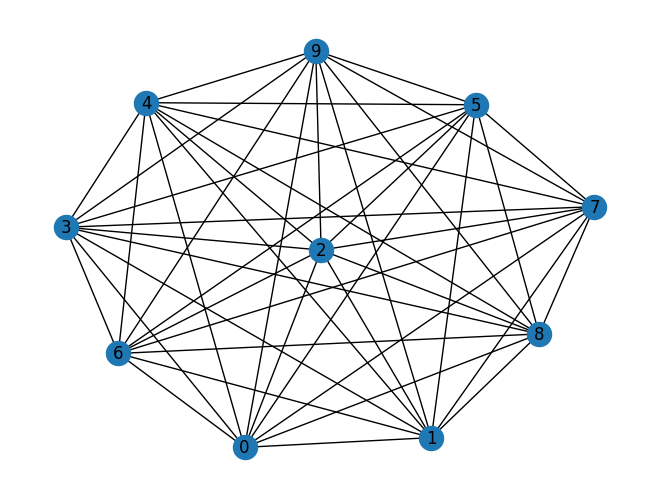

In [3]:
nx.draw(G1, with_labels = True)

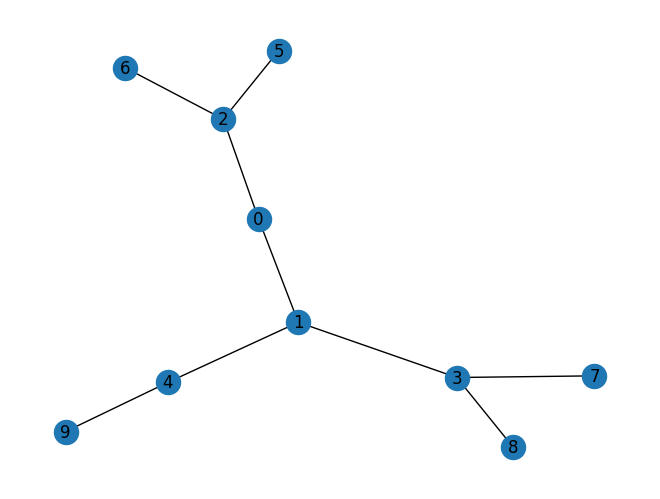

In [4]:
nx.draw(G2, with_labels = True)

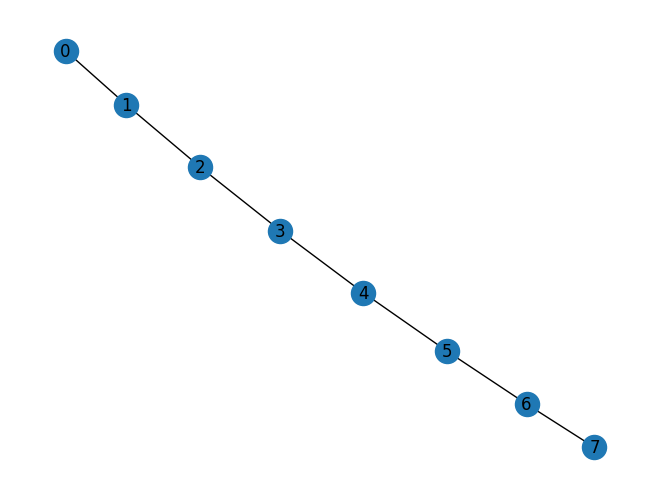

In [5]:
nx.draw(G3, with_labels = True)

In [7]:
# 1.2. Compute kernel methods to measure the similarity between pairs of grap
def compute_kernel_methods(graphs, method):
    graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

    # Compute kernel method
    if method == "WL":
        gk = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "n_iter": 3}], normalize=True)
    else:
        gk = GraphKernel(kernel=[{"name": method}], normalize=True)
    
    # Return similarity scores among pairs of graphs in the list of graphs
    similarity_arr = gk.fit_transform(graphs)
    
    return similarity_arr

nx_graphs = [G1, G2, G3]

# Shortest path for G1, G2, and G3
similarity_arr = compute_kernel_methods(nx_graphs, "shortest_path")

similarity_arr

array([[1.        , 0.2       , 0.19720266],
       [0.2       , 1.        , 0.05634362],
       [0.19720266, 0.05634362, 1.        ]])

In [8]:
# Random walk for G2 and G3
nx_graphs = [G2, G3]

# Call the user-defined function to compute random walk kernel
similarity_arr = compute_kernel_methods(nx_graphs, "random_walk")

similarity_arr

array([[1.       , 0.9936859],
       [0.9936859, 1.       ]])

In [9]:
# WL with iteration=3 for G1, G2, and G3
nx_graphs = [G1, G2, G3]

similarity_arr = compute_kernel_methods(nx_graphs, "WL")

similarity_arr

array([[1.       , 0.25     , 0.2236068],
       [0.25     , 1.       , 0.2236068],
       [0.2236068, 0.2236068, 1.       ]])

[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
[]


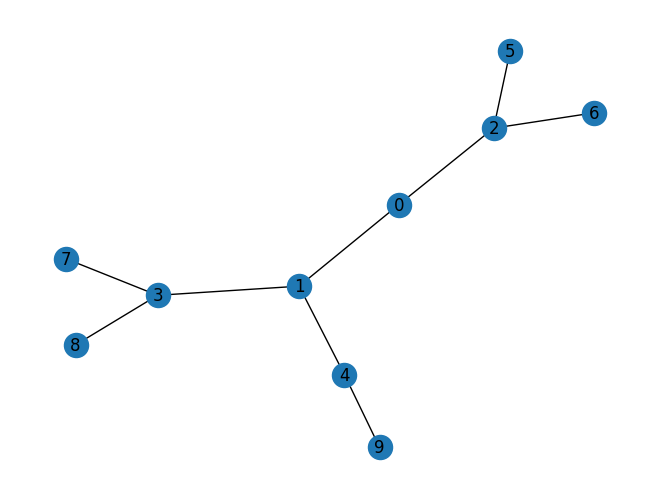

In [10]:
# 1.3. Transform G1 to G2.
D1 = nx.difference(G1, G2)
print(D1.edges)
D2 = nx.difference(G2, G1)
print(D2.edges)
# Remove the different edges of G1
G1.remove_edges_from(D1.edges)
# Add the different edges of G2
G1.add_edges_from(D2.edges)
nx.draw(G1, with_labels = True)

# 2. Node classification:
### 2.1. Create graphs as the following:
+ G1: a balanced tree containing 20 nodes: each node has 4 children.
+ G2: a balanced binary tree containing 30 nodes.
### 2.2. IN G1, let compute label propagation and assign label attributes (value is the color code) for all nodes based on the results.
+ Color code list: ["#00C98D", "#e55039", "#5030C0", "#50F0F0", "#0c2461", "#f8c291", "#78e08f"]
### 2.3. Unlabel nodes with index: 3, 8, 10 in G1.
### 2.4. Use simrank method to assign new labels for un-labelled nodes of G1.
### 2.5. Compute Rolx method on G2.

In [81]:
# 2. Node classification:
# 2.1. Create graphs:
# G1: a balanced tree containing 20 nodes: each node has 4 children.
G1 = nx.full_rary_tree(4, 20)

# G2: a balanced binary tree containing 30 nodes.
G2 = nx.full_rary_tree(2, 30)

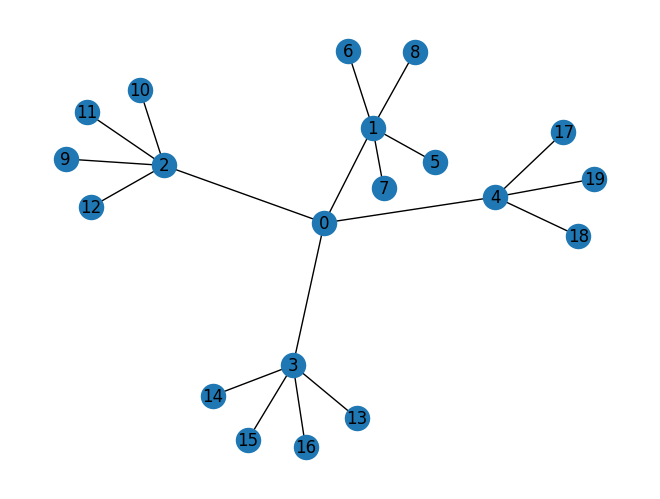

In [82]:
nx.draw(G1, with_labels = True)

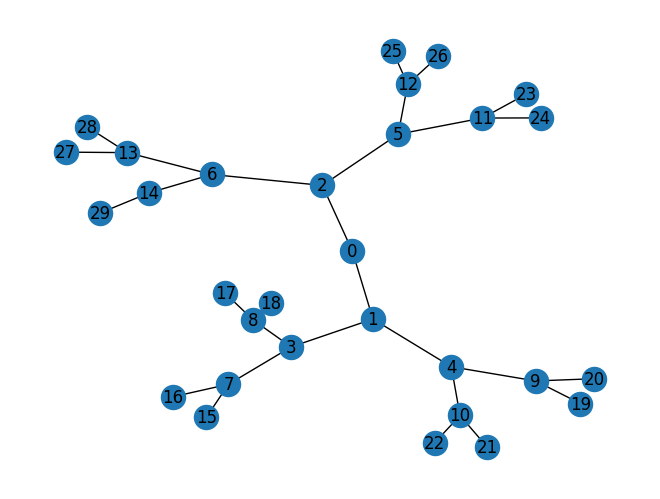

In [84]:
nx.draw(G2, with_labels = True)

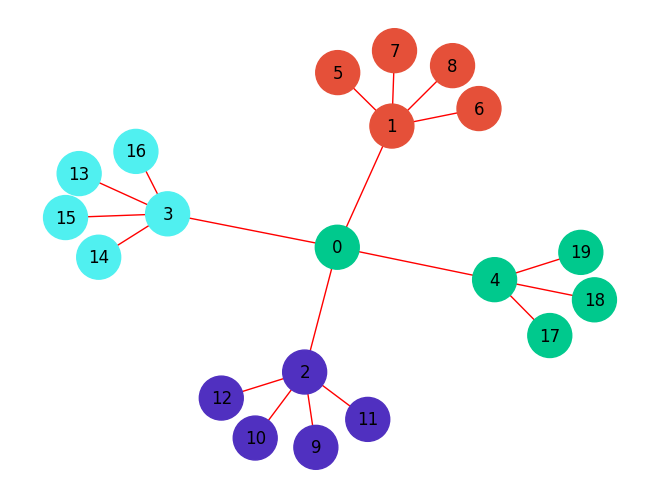

In [87]:
# 2.2. In G1, let compute label propagation and assign label attributes (value is the color code) for all nodes based on the results
#fill labels in graph G
def fill_labels(G):
    colors = ["#00C98D", "#e55039", "#5030C0", "#50F0F0", "#0c2461", "#f8c291", "#78e08f"]
    label_propagation = community.label_propagation_communities(G)
    
    counter = 0
    for label in label_propagation:
        for n in label:
            G.nodes[n]['label'] = colors[counter]

        counter = counter + 1
    
    return G

def draw_graph_with_label_colors(G, pos=None):
    colors = []
    for node in G:
        colors.append(G.nodes[node]['label'])

    options = {
        'node_color': colors,      # color of node
        'node_size':1000,          # size of node
        'width': 1,                 # line width of edges
        'arrowstyle': '-|>',        # array style for directed graph
        'arrowsize': 18,            # size of arrow
        'edge_color':'red',         # edge color
    }

    if pos is None:
        pos = nx.circular_layout(G)

    nx.draw(G, pos, with_labels = True, arrows=False, **options)

fill_labels(G1)
draw_graph_with_label_colors(G1, pos = nx.spring_layout(G1))

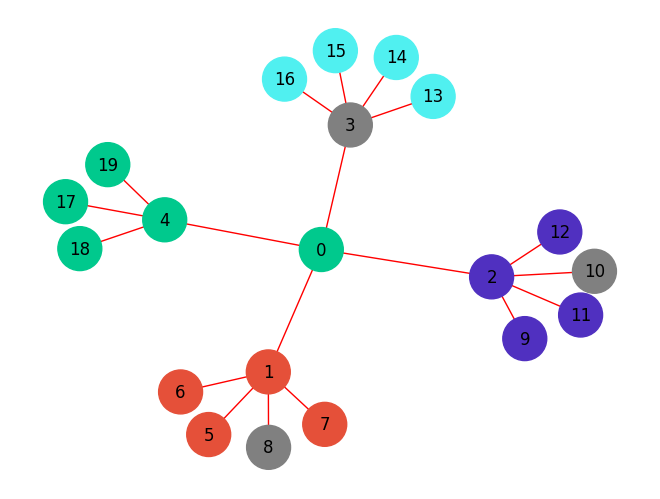

In [76]:
# 2.3. Unlabel nodes with index: 3, 8, 10 in G1
unlabel_set = [3, 8, 10]
for n in unlabel_set:
    G2.nodes[n]['label'] = 'grey'
draw_graph_with_label_colors(G2, pos = nx.spring_layout(G2))

+ Simrank score for node 3: {0: 0.0, 1: 0.3556665300453328, 2: 0.3556665300453328, 4: 0.3781256241703864, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0}
+ Most similar node of node 3: 4 

+ Simrank score for node 8: {0: 0.47006535865400945, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.9, 6: 0.9, 7: 0.9, 9: 0.32001348991552686, 10: 0.32001348991552686, 11: 0.32001348991552686, 12: 0.32001348991552686, 13: 0.32001348991552686, 14: 0.32001348991552686, 15: 0.32001348991552686, 16: 0.32001348991552686, 17: 0.34023445478498404, 18: 0.34023445478498404, 19: 0.34023445478498404}
+ Most similar node of node 8: 5 

+ Simrank score for node 10: {0: 0.47006535865400945, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.32001348991552686, 6: 0.32001348991552686, 7: 0.32001348991552686, 8: 0.32001348991552686, 9: 0.9, 11: 0.9, 12: 0.9, 13: 0.32001348991552686, 14: 0.32001348991552686, 15: 0.32001348991552686, 16: 0.32001348991552686, 17:

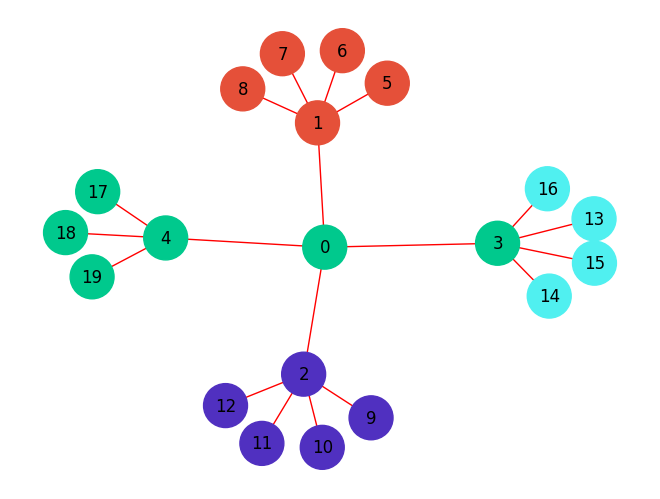

In [90]:
# 2.4. Use simrank method to assign new labels for un-labelled nodes of G1
# A function to calculate simrank similarity for an un-labelled node and assign its label based on the most similar node
def update_node_label(G, node):
    # Get Simrank similarity for a node
    simrank = nx.simrank_similarity(G, source=node)
    del simrank[node]
    print(f"+ Simrank score for node {node}: {simrank}")

    #finding the nodeID that have highest Simrank.
    most_similar_node = max(simrank, key=lambda k: simrank[k])
    
    print(f"+ Most similar node of node {node}: {most_similar_node} \n")

    G.nodes[node]['label'] = G.nodes[most_similar_node]['label']
    
# Update labels for un-labelled nodes
for n in unlabel_set:
    update_node_label(G1, n)
    
draw_graph_with_label_colors(G1, pos = nx.spring_layout(G1))


Features extracted from 2 recursive generations:
    external_edges(mean)  degree  external_edges
0               5.000000       2               4
1               5.333333       3               5
2               5.000000       3               5
3               3.000000       3               6
4               3.000000       3               6
5               3.000000       3               6
6               3.000000       3               5
7               3.333333       3               2
8               3.333333       3               2
9               3.333333       3               2
10              3.333333       3               2
11              3.333333       3               2
12              3.333333       3               2
13              3.000000       3               2
14              3.000000       2               2
15              2.000000       1               2
16              2.000000       1               2
17              2.000000       1               2
18              2.0

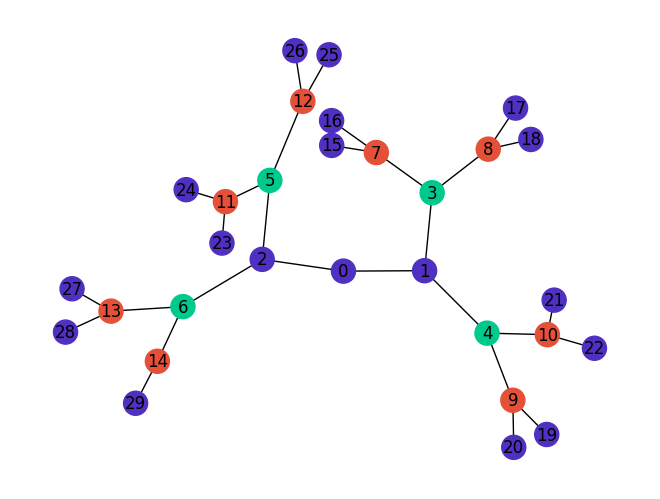

In [92]:
# 2.5. Compute Rolx method on G2.
# A function compute role extraction to assign roles for nodes
def assign_roles(G, num_roles=5):
    # extract features from 1 recursive generations:
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()

    print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
    print(features)
    
    # assign node roles
    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)
    node_roles = role_extractor.roles

    print('\nNode role membership by percentage:')
    print(role_extractor.role_percentage.round(2))
    
    return node_roles

node_roles = assign_roles(G2)

def draw_graph_from_roles(G, node_roles):
    # build color palette for plotting
    unique_roles = sorted(set(node_roles.values()))
    color_map = ["#00C98D", "#e55039", "#5030C0", "#50F0F0", "#0c2461", "#f8c291", "#78e08f"]
    # map roles to colors
    role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
    # build list of colors for all nodes in G
    node_colors = [role_colors[node_roles[node]] for node in G.nodes]
    # plot graph
    plt.figure()

    with warnings.catch_warnings():
        # catch matplotlib deprecation warning
        warnings.simplefilter('ignore')
        nx.draw(
            G,
            pos=nx.spring_layout(G, seed=42),
            with_labels=True,
            node_color=node_colors,
        )
        
draw_graph_from_roles(G2, node_roles)